In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load

from sklearn.feature_selection import RFECV

In [156]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
df_data= pd.concat([train_data, test_data], ignore_index=True)

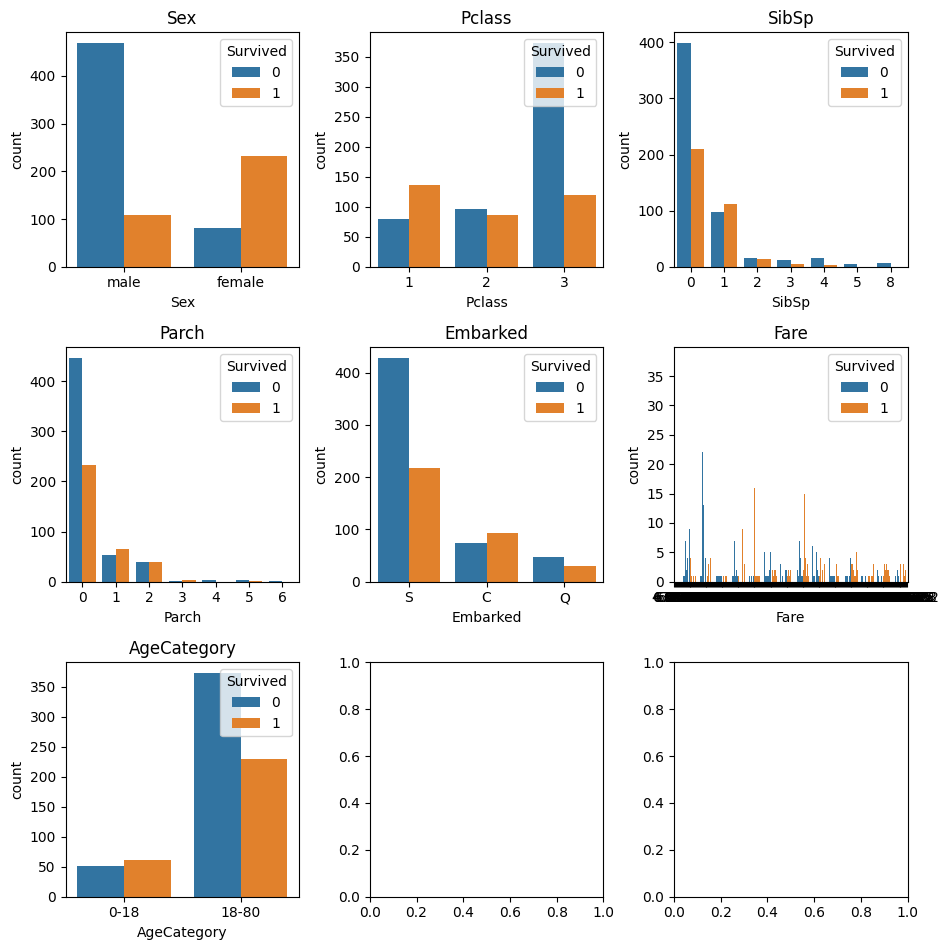

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame
# Create age categories
bins = [0, 18, float('inf')]
labels = ['0-18', '18-80']
train_data['AgeCategory'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

# Update the features list to include the new AgeCategory
features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Fare', 'AgeCategory']

rows = 3
cols = 3

# The subplot grid and figure size of each graph
fig, axs = plt.subplots(rows, cols, figsize=(cols * 3.2, rows * 3.2))

for r in range(0, rows):
    for c in range(0, cols):
        i = r * cols + c  # index to go through the number of features
        if i < len(features):
            ax = axs[r][c]  # position for each subplot
            sns.countplot(data=train_data, x=features[i], hue='Survived', ax=ax)
            ax.set_title(features[i])
            ax.legend(title='Survived', loc='upper right')

plt.tight_layout()
plt.show()



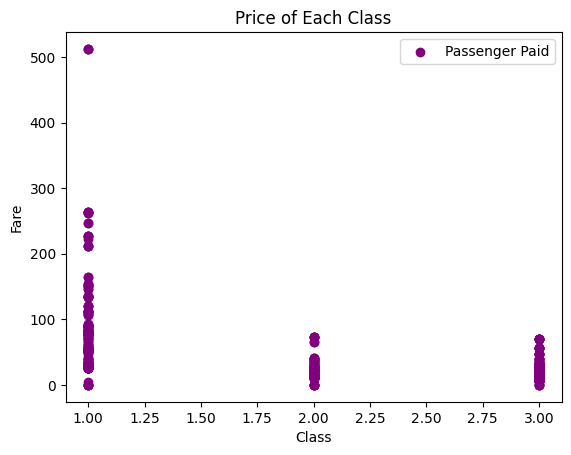

In [108]:
plt.scatter(train_data['Pclass'],train_data['Fare'], color = 'purple', label = 'Passenger Paid')

plt.ylabel('Fare')
plt.xlabel('Class')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [127]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [157]:
# extracted title using name
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_data['Title'] = df_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer', 
                                                'Major','Rev','Sir'],'Rare') 
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_data['Title'] = df_data['Title'].replace(['Lady'],'Mrs')
df_data['Title'] = df_data['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti = df_data.groupby('Title')['Age'].median()
Ti

Title
0    29.0
1    47.0
2     4.0
3    22.0
4    36.0
Name: Age, dtype: float64

In [158]:
Ti_pred = df_data.groupby('Title')['Age'].median().values
df_data['Ti_Age'] = df_data['Age']
# Filling the missing age
for i in range(0,5):
 # 0 1 2 3 4 5
    df_data.loc[(df_data.Age.isnull()) & (df_data.Title == i),'Ti_Age'] = Ti_pred[i]
df_data['Ti_Age'] = df_data['Ti_Age'].astype('int')
df_data['Ti_Minor'] = ((df_data['Ti_Age']) < 16.0) * 1

In [159]:
train_data = df_data[:len(train_data)]
test_data = df_data[len(train_data):]

In [160]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Ti_Age           0
Ti_Minor         0
dtype: int64

In [161]:
test_data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Ti_Age           0
Ti_Minor         0
dtype: int64

In [162]:
# Drop the columns
train_data = train_data.drop(['Cabin','Name','PassengerId','Ticket','Age'], axis=1)
# Remove the rows with missing values
train_data = train_data.dropna(subset =  ['Embarked'])

In [163]:
test_data = test_data.drop(['Cabin','Name','Ticket','Age','Survived'], axis=1)

In [164]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
Ti_Age      0
Ti_Minor    0
dtype: int64

In [165]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
Ti_Age         0
Ti_Minor       0
dtype: int64

In [166]:
labelencoder = LabelEncoder()

# Encode the sex column
train_data.iloc[:, 2] = labelencoder.fit_transform(train_data.iloc[:, 2].values)
test_data.iloc[:, 2] = labelencoder.fit_transform(test_data.iloc[:, 2].values)

# Encode the embarked column
train_data.iloc[:, 6] = labelencoder.fit_transform(train_data.iloc[:, 6].values)
test_data.iloc[:, 6] = labelencoder.fit_transform(test_data.iloc[:, 6].values)

In [150]:
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())
print(test_data['Sex'].unique())
print(test_data['Embarked'].unique())

[1 0]
[2 0 1]
[1 0]
[1 2 0]


In [151]:
test_data

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Ti_Age,Ti_Minor
891,892,3,1,0,0,7.8292,1,0,34,0
892,893,3,0,1,0,7.0000,2,4,47,0
893,894,2,1,0,0,9.6875,1,0,62,0
894,895,3,1,0,0,8.6625,2,0,27,0
895,896,3,0,1,1,12.2875,2,4,22,0
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0,0,8.0500,2,0,29,0
1305,1306,1,0,0,0,108.9000,0,1,39,0
1306,1307,3,1,0,0,7.2500,2,0,38,0
1307,1308,3,1,0,0,8.0500,2,0,29,0


In [183]:
x = train_data[['Sex', 'Pclass', 'SibSp','Parch','Embarked','Ti_Minor']]
y = train_data.iloc[:, 0].values

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [184]:
sc = StandardScaler()
X_trian = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [180]:
model = RandomForestClassifier (random_state=2,n_estimators=250,min_samples_split=20,oob_score=True) 
model.fit(X_train, y_train)
print('Base oob score :%.5f' % (model.oob_score_))

Base oob score :0.85373


In [177]:
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model2.fit(X_train, y_train)
print('score :%.5f' %model2.score(X_train, y_train))

score :0.88326


In [181]:
# Make predictions on the test set using the same features as the base model
X_test = test_data[['Sex', 'Pclass', 'SibSp','Parch','Embarked','Ti_Minor']]
predictions = model.predict(X_test)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# Save the DataFrame to a CSV file
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('gender_submission.csv', index=False)


print("Submission file created: submission.csv")

Submission file created: submission.csv


In [179]:
# Make predictions on the test set using the same features as the base model
X_test = test_data[['Sex', 'Pclass', 'SibSp','Parch','Embarked','Ti_Minor']]
predictions = model2.predict(X_test)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# Save the DataFrame to a CSV file
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('gender_submission.csv', index=False)


print("Submission file created: submission.csv")

Submission file created: submission.csv
